In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
categorical_columns = df.dtypes[df.dtypes == 'object'].index

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [6]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
tc = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [8]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [9]:
df.totalcharges = df.totalcharges.fillna(0)

In [10]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [11]:
df.churn = (df.churn=="yes").astype(int)

In [12]:
#Lesson 3 - setting up validation framework

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#train_test_split?

In [15]:
df_full_train, df_test = train_test_split(df, test_size = 0.2,
                random_state = 1)

In [16]:
len(df_full_train), len(df_test)

(5634, 1409)

In [17]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25,
                                   random_state = 1)

In [18]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [21]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [22]:
#EDA

In [23]:
df_full_train = df_full_train.reset_index(drop=True)

In [24]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [25]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.6,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.9,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.5,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.1,1


In [26]:
#EDA

In [27]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [28]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [29]:
global_churn_rate = df_full_train.churn.mean()

In [30]:
round(global_churn_rate,2)

0.27

In [31]:
#categorical and numerical variables
df_full_train.dtypes


customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int32
dtype: object

In [32]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [33]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'churn']

In [34]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
churn               2
dtype: int64

In [35]:
#lesson 5 - feature importance

In [36]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [37]:
df_full_train[df_full_train['gender']=="male"]['churn'].value_counts(normalize=True)

0    0.736786
1    0.263214
Name: churn, dtype: float64

In [38]:
df_full_train[df_full_train['gender']=="female"]['churn'].value_counts(normalize=True)

0    0.723176
1    0.276824
Name: churn, dtype: float64

In [39]:
global_churn_rate

0.26996805111821087

In [40]:
(df_full_train['partner']=="yes").astype(int).mean()

0.47958821441249555

In [41]:
#difference from global metric, risk ratio

In [42]:
#continue from 10:15

In [43]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])

In [44]:
df_group

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [45]:
df_group['diff'] = df_group['mean'] - global_churn_rate

In [46]:
df_group

,mean,count,diff
gender,,,
female,0.276824,2796,0.006856
male,0.263214,2838,-0.006755


In [47]:
from IPython.display import display

In [48]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121




churn


,mean,count,diff,risk
churn,,,,
0,0.0,4113,-0.269968,0.000000
1,1.0,1521,0.730032,3.704142


In [49]:
#3.6 - mutual information

In [50]:
from sklearn.metrics import mutual_info_score

In [51]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [52]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [53]:
t = {}
for c in categorical:
    t[c] = mutual_info_score(df_full_train['churn'], df_full_train[c])

In [54]:
t

{'gender': 0.0001174846211139946,
 'seniorcitizen': 0.009410216144208144,
 'partner': 0.009967689095399745,
 'dependents': 0.012345815445534689,
 'phoneservice': 0.00022871269738296285,
 'multiplelines': 0.0008574478744731856,
 'internetservice': 0.055867945893496467,
 'onlinesecurity': 0.06308524972985574,
 'onlinebackup': 0.0469234640537918,
 'deviceprotection': 0.04345286925268559,
 'techsupport': 0.06103245991777444,
 'streamingtv': 0.03185333110086085,
 'streamingmovies': 0.03158089669519908,
 'contract': 0.0983203874041556,
 'paperlessbilling': 0.01758882715925275,
 'paymentmethod': 0.043210027531582915,
 'churn': 0.5832270604600812}

In [55]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [56]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)

churn               0.583227
contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [57]:
x = pd.DataFrame([t]).T

In [58]:
x.columns

RangeIndex(start=0, stop=1, step=1)

In [59]:
x[0].sort_values(ascending=False)

churn               0.583227
contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
Name: 0, dtype: float64

In [60]:
#continue from 3.7 - correlation
#pearson correlaion coefficient can be between -1 and +1

In [61]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [62]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.6
5630,60,19.95,1189.9
5631,28,105.70,2979.5
5632,2,54.40,114.1


In [63]:
df_full_train[df_full_train.tenure <=2].churn.mean()

0.5953420669577875

In [64]:
df_full_train[(df_full_train.tenure >2) 
             & (df_full_train.tenure <12)].churn.mean()

0.4059003051881994

In [65]:
df_full_train[(df_full_train.tenure >12)].churn.mean()

0.17634908339788277

In [66]:
df_full_train[df_full_train.tenure <=2].churn.mean()

0.5953420669577875

In [67]:
df['monthlycharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthlycharges, dtype: float64

In [68]:
df_full_train[df_full_train['monthlycharges'] <=20].churn.mean()

0.08795411089866156

In [69]:
df_full_train[(df_full_train['monthlycharges'] >20) & 
             df_full_train['monthlycharges'] <= 70.35].churn.mean()

0.26996805111821087

In [70]:
df_full_train[(df_full_train['monthlycharges'] >70.25)].churn.mean()

0.35802469135802467

In [71]:
#tenure goes up, churn goes down - Longer people have stayed, they churn less
#monthly charges go up, churn goes up -- people with more expensive plans churn

In [72]:
# 3.8 - one hot encoding - for categorical variables - scikit learn

In [73]:
from sklearn.feature_extraction import DictVectorizer

In [74]:
dicts = df_train[['gender', 'contract']].to_dict(orient='records')

In [75]:
dc = DictVectorizer(sparse = False)

In [76]:
dc.fit(dicts)

DictVectorizer(sparse=False)

In [77]:
dc.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.]])

In [78]:
dc.get_feature_names()

C:\Users\Prashanth\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

In [79]:
df_train[categorical + numerical]

KeyError: "['churn'] not in index"

In [ ]:
categorical.remove('churn')

In [ ]:
df_full_train['totalcharges'].astype(int)

In [ ]:
train_dicts = df_full_train[categorical + numerical].to_dict(orient = "records")

In [ ]:
train_dicts[0]

In [ ]:
dv = DictVectorizer(sparse=False)

In [ ]:
dv.fit(train_dicts)

In [ ]:
dv.transform(train_dicts)

In [ ]:
dv.get_feature_names()

In [ ]:
df_full_train.dtypes

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts

In [ ]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [ ]:
val_dicts = df_val[categorical + numerical].to_dict(orient="records")
X_val = dv.transform(val_dicts)

In [ ]:
#3.9 logistic Regression

In [80]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [81]:
z = np.linspace(-10,10,50)

In [82]:
z

array([-10.        ,  -9.59183673,  -9.18367347,  -8.7755102 ,
        -8.36734694,  -7.95918367,  -7.55102041,  -7.14285714,
        -6.73469388,  -6.32653061,  -5.91836735,  -5.51020408,
        -5.10204082,  -4.69387755,  -4.28571429,  -3.87755102,
        -3.46938776,  -3.06122449,  -2.65306122,  -2.24489796,
        -1.83673469,  -1.42857143,  -1.02040816,  -0.6122449 ,
        -0.20408163,   0.20408163,   0.6122449 ,   1.02040816,
         1.42857143,   1.83673469,   2.24489796,   2.65306122,
         3.06122449,   3.46938776,   3.87755102,   4.28571429,
         4.69387755,   5.10204082,   5.51020408,   5.91836735,
         6.32653061,   6.73469388,   7.14285714,   7.55102041,
         7.95918367,   8.36734694,   8.7755102 ,   9.18367347,
         9.59183673,  10.        ])

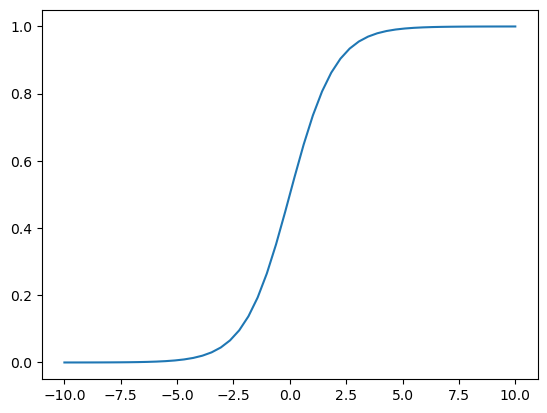

In [84]:
plt.plot(z, sigmoid(z))

In [86]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] + w[j]
        
    result = sigmoid(score)
    return result

In [87]:
#continue from 3.10